#Consider the dataset available on the attached kaggle link.It is multiclass classification problem.Build a CNN model which will work well with test dataset.

##Note:
###Use hyper parameter tuning fro better result.
###Evaluate your model.

In [1]:
!pip install kaggle

In [2]:
# Making a Directory
! mkdir ~/.kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! cp /content/drive/MyDrive/KAGGLE/kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 342M/346M [00:08<00:00, 40.0MB/s]
100% 346M/346M [00:09<00:00, 40.2MB/s]


In [7]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [8]:
import os

In [9]:
os.listdir('/content/seg_train/seg_train')

['forest', 'sea', 'street', 'glacier', 'mountain', 'buildings']

In [10]:
train_L = os.listdir('/content/seg_train/seg_train')

In [11]:
buildings_train_dir=os.path.join('/content/seg_train/seg_train/buildings')
forest_train_dir=os.path.join('/content/seg_train/seg_train/forest')
glacier_train_dir=os.path.join('/content/seg_train/seg_train/glacier')
mountain_train_dir=os.path.join('/content/seg_train/seg_train/mountain')
sea_train_dir=os.path.join('/content/seg_train/seg_train/sea')
street_train_dir=os.path.join('/content/seg_train/seg_train/street')

buildings_test_dir=os.path.join('/content/seg_test/seg_test/buildings')
forest_test_dir=os.path.join('/content/seg_test/seg_test/forest')
glacier_test_dir=os.path.join('/content/seg_test/seg_test/glacier')
mountain_test_dir=os.path.join('/content/seg_test/seg_test/mountain')
sea_test_dir=os.path.join('/content/seg_test/seg_test/sea')
street_test_dir=os.path.join('/content/seg_test/seg_test/street')

In [12]:
buildings_train = os.listdir(buildings_train_dir)
forest_train = os.listdir(forest_train_dir)
glacier_train = os.listdir(glacier_train_dir)
mountain_train = os.listdir(mountain_train_dir)
sea_train =  os.listdir(sea_train_dir)
street_train =  os.listdir(street_train_dir)

print(len(buildings_train))
print(len(forest_train))
print(len(glacier_train))
print(len(mountain_train))
print(len(sea_train))
print(len(street_train))

2191
2271
2404
2512
2274
2382


In [13]:
buildings_test = os.listdir(buildings_test_dir)
forest_test = os.listdir(forest_test_dir)
glacier_test = os.listdir(glacier_test_dir)
mountain_test = os.listdir(mountain_test_dir)
sea_test =  os.listdir(sea_test_dir)
street_test =  os.listdir(street_test_dir)

print(len(buildings_test))
print(len(forest_test))
print(len(glacier_test))
print(len(mountain_test))
print(len(sea_test))
print(len(street_test))

437
474
553
525
510
501


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta,Adagrad,Adamax,SGD

import cv2
import tensorflow_hub as hub
from keras.layers import Dense,Flatten
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D
from tensorflow.keras.regularizers import L1L2,L2,L1

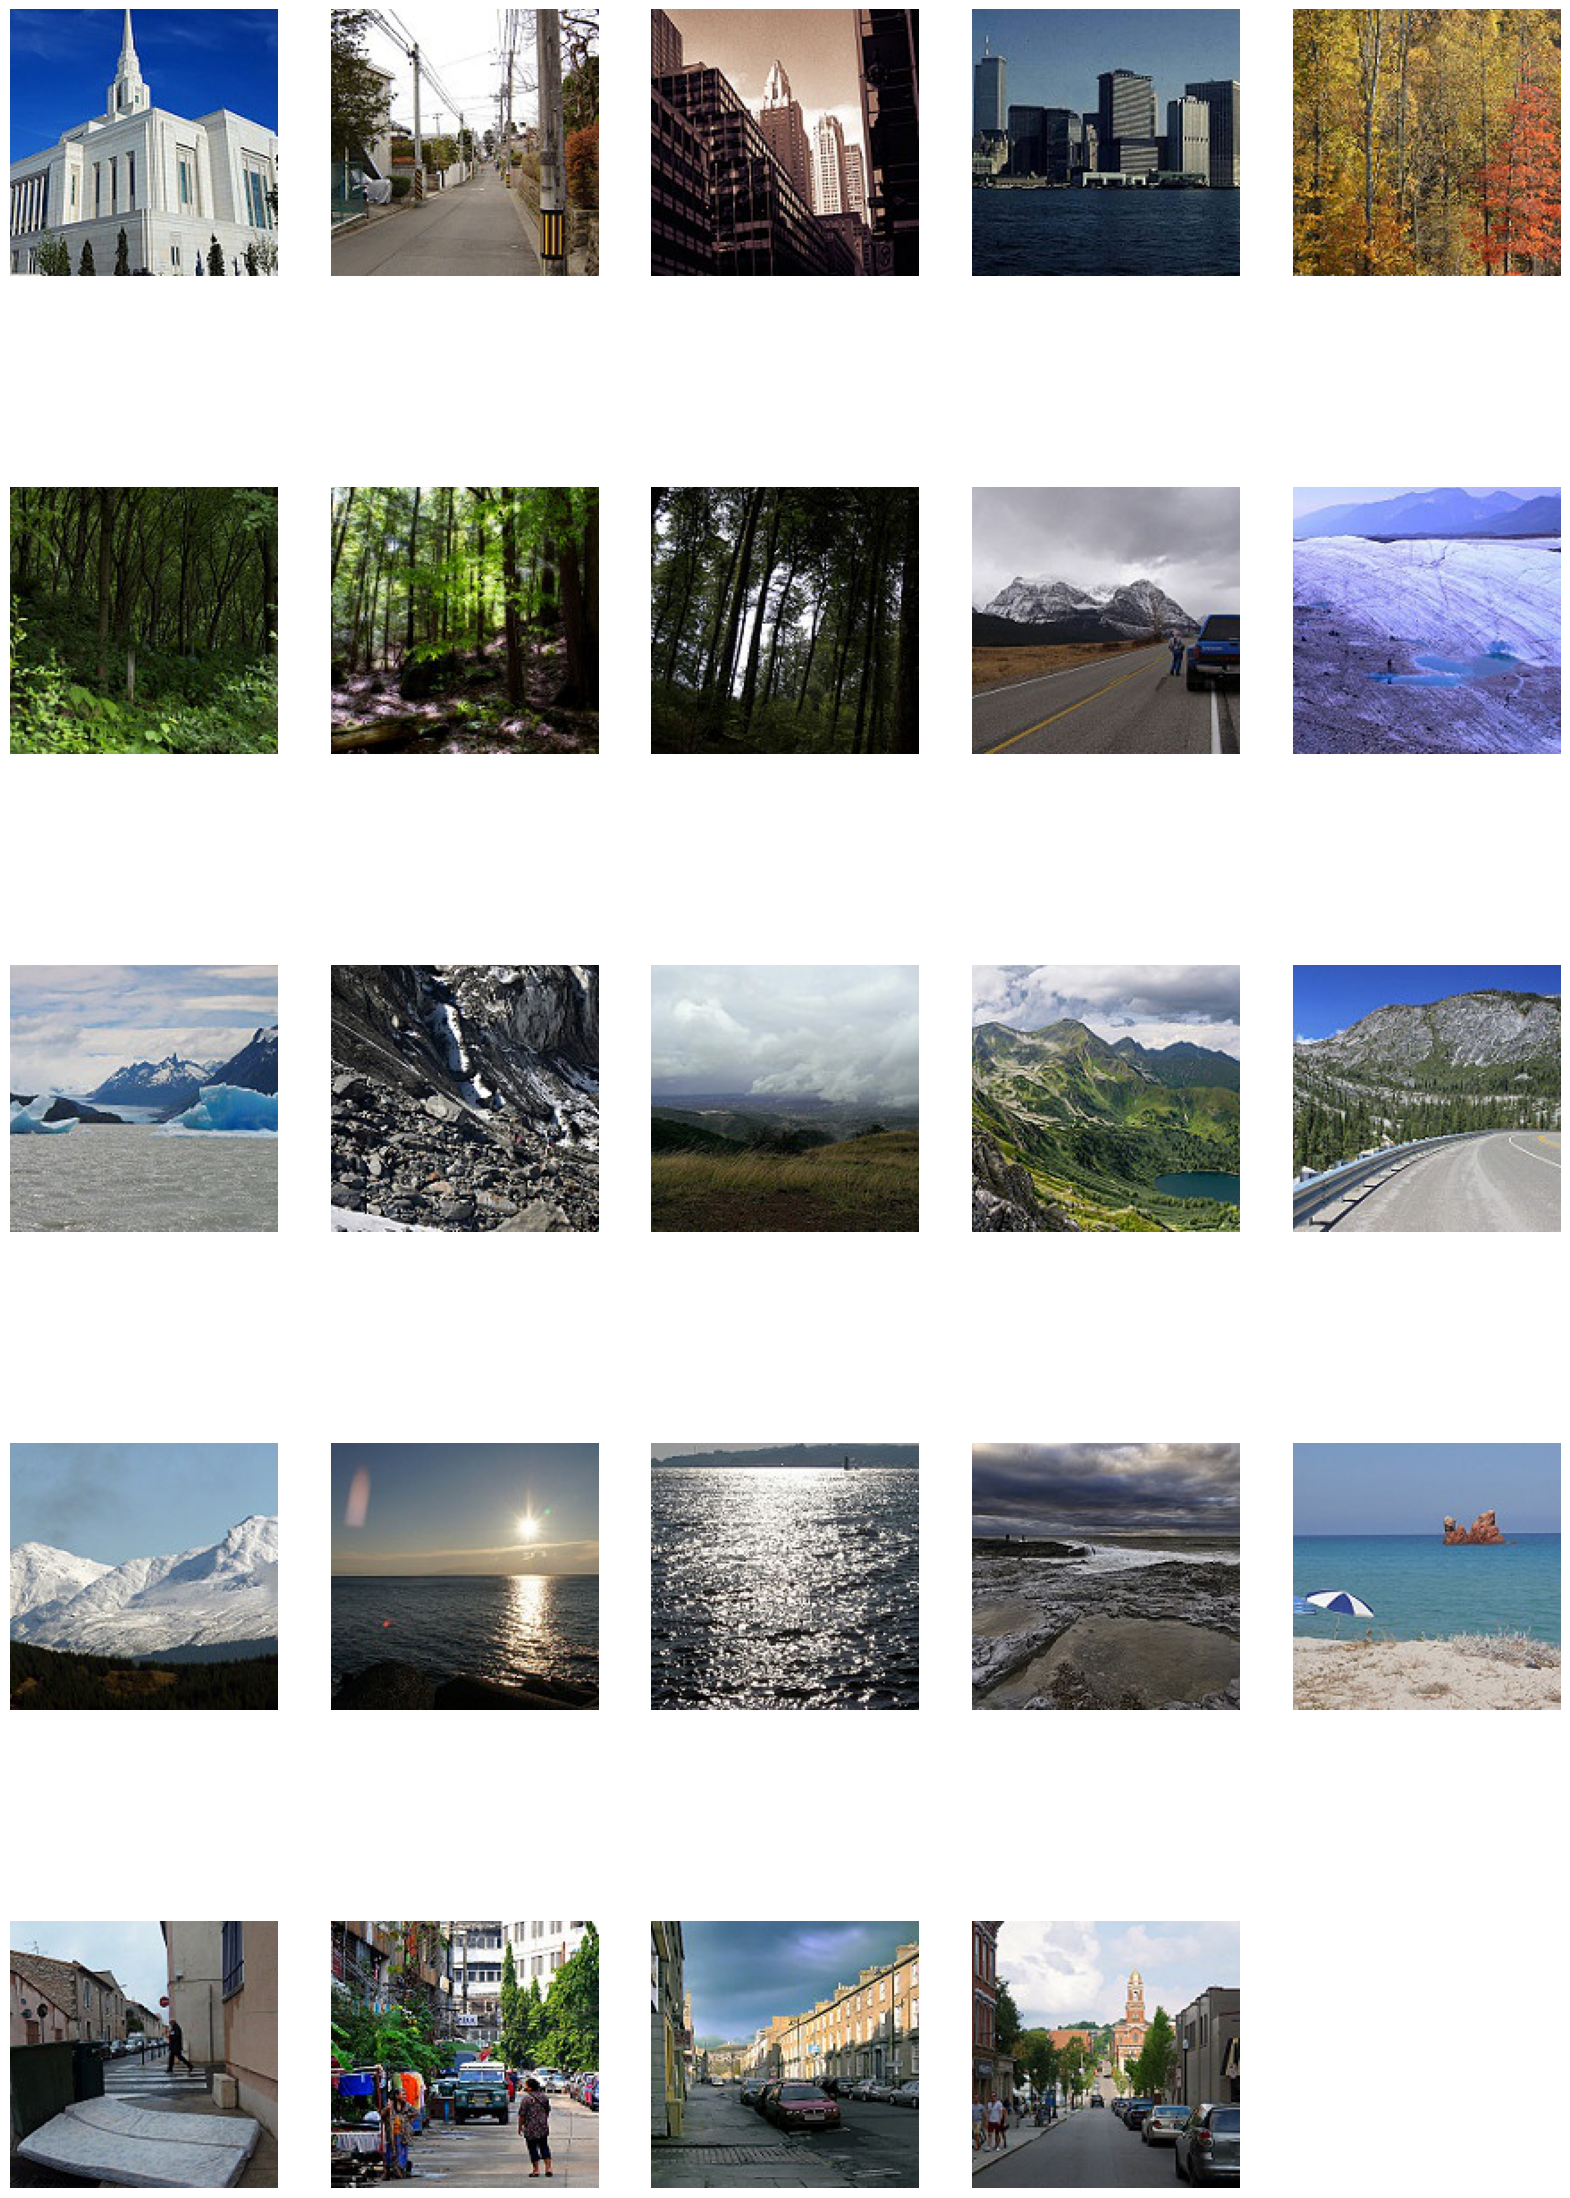

In [15]:
import matplotlib.image as mpimg

nrows = 5
ncols = 5
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 6)

buildings_train_pic = [os.path.join(buildings_train_dir,fname) for fname in buildings_train[pic_index:pic_index+4]]
forest_train_pic = [os.path.join(forest_train_dir,fname) for fname in forest_train[pic_index:pic_index+4]]
glacier_train_pic = [os.path.join(glacier_train_dir,fname) for fname in glacier_train[pic_index:pic_index+4]]
mountain_train_pic = [os.path.join(mountain_train_dir,fname) for fname in mountain_train[pic_index:pic_index+4]]
sea_train_pic = [os.path.join(sea_train_dir,fname) for fname in sea_train[pic_index:pic_index+4]]
street_train_train_pic = [os.path.join(street_train_dir,fname) for fname in street_train[pic_index:pic_index+4]]
for i,img_path in enumerate(buildings_train_pic+forest_train_pic+glacier_train_pic+mountain_train_pic+sea_train_pic+street_train_train_pic):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [16]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range= 0.2,
        width_shift_range = 0.2,
        height_shift_range = 0.2,

        rotation_range = 40)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory("./seg_train/seg_train",
                                                    target_size= (150,150),
                                                    batch_size = 120,
                                                    class_mode = 'categorical')


val_generator = test_datagen.flow_from_directory("/content/seg_test/seg_test",
                                                    target_size= (150,150),
                                                    batch_size = 120,
                                                    class_mode = 'categorical')


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [17]:
!pip install keras-tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.1 MB/s eta 0:00:00


In [21]:
def build_model(hp):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 16 ,kernel_size = 2, padding = 'same',activation='relu',input_shape=(150,150,3))])

  unit = hp.Int("Filters",8,120,1)
  #opti =  hp.Choice("optimizer",values = ['adam','rmsprop','sgd','adadelta','adagrad','adamax'])
  active = hp.Choice("activation",values = ["relu","tanh","softmax"])
  hp_lr = hp.Choice("Learning Rate",values = [1e-2,1e-3,1e-4])

  for i in range(hp.Int("Layers",min_value=1,max_value = 15)):
    model.add(Conv2D(filters = unit,kernel_size = 5, padding = 'same',activation = active))
    if model.output_shape[1] > 1 and model.output_shape[2] > 1:
            model.add(MaxPooling2D(2,2))

  model.add(Flatten())
  model.add(Dense(6,activation = "softmax"))
  model.compile(optimizer = Adam(learning_rate=hp_lr), loss = "categorical_crossentropy", metrics=["accuracy"])

  return model

In [22]:
tuner = kt.RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 10,
    directory = "tuning",
    project_name = "version_1"
    )

In [23]:
tuner.search(train_generator,epochs =6 , validation_data = val_generator)

Trial 10 Complete [00h 12m 12s]
val_accuracy: 0.18433333933353424

Best val_accuracy So Far: 0.7260000109672546
Total elapsed time: 01h 58m 45s


In [24]:
tuner.get_best_hyperparameters()[0].values

{'Filters': 11, 'activation': 'relu', 'Learning Rate': 0.001, 'Layers': 3}

In [25]:
model = tuner.get_best_models(num_models=1)[0]

In [26]:
model.fit(train_generator,epochs=30,initial_epoch = 6,validation_data=val_generator,verbose =1, steps_per_epoch= 8)

Epoch 7/30
8/8 [==============================] - 13s 1s/step - loss: 0.8272 - accuracy: 0.6917 - val_loss: 0.7368 - val_accuracy: 0.7210
Epoch 8/30
8/8 [==============================] - 11s 2s/step - loss: 0.7678 - accuracy: 0.7317 - val_loss: 0.8398 - val_accuracy: 0.6940
Epoch 9/30
8/8 [==============================] - 11s 1s/step - loss: 0.8827 - accuracy: 0.6530 - val_loss: 0.7276 - val_accuracy: 0.7297
Epoch 10/30
8/8 [==============================] - 10s 1s/step - loss: 0.8093 - accuracy: 0.7023 - val_loss: 0.7756 - val_accuracy: 0.7127
Epoch 11/30
8/8 [==============================] - 12s 1s/step - loss: 0.8196 - accuracy: 0.6979 - val_loss: 0.7658 - val_accuracy: 0.7210
Epoch 12/30
8/8 [==============================] - 11s 1s/step - loss: 0.8549 - accuracy: 0.6865 - val_loss: 0.8645 - val_accuracy: 0.6827
Epoch 13/30
8/8 [==============================] - 11s 1s/step - loss: 0.8706 - accuracy: 0.6625 - val_loss: 0.7477 - val_accuracy: 0.7240
Epoch 14/30
8/8 [=============

In [27]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory('/content/seg_pred/',
                                                  target_size= (150,150),
                                                  batch_size = 32,
                                                  class_mode = 'categorical',
                                                  shuffle=True)

Found 7301 images belonging to 1 classes.


In [28]:
predictions = model.predict(test_generator)

229/229 [==============================] - 12s 51ms/step


In [29]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=32)

229/229 [==============================] - 11s 48ms/step - loss: 27.1871 - accuracy: 0.1601
